### Plot a batch of neural activity sequences from train and validation datasets.
---
*Last updated: 13 November 2023*

In [1]:
import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import TwoSlopeNorm
from matplotlib.collections import LineCollection
from utils import NEURON_LABELS, ROOT_DIR, init_random_seeds

# Initialize the random seeds
init_random_seeds(42)

Loading from /orcd/home/001/qsimeon/worm-graph/data/raw/neuron_master_sheet.csv.

CUDA device found.
	 GPU: NVIDIA H100 80GB HBM3


In [2]:
# Load the data tensors
tensor_file = os.path.join(ROOT_DIR, "data", "datasets", "full_dataset.pt")
if os.path.exists(tensor_file):
    print("Loading dataset file ...")
    combined_dataset_pt = torch.load(tensor_file)
else:
    raise FileNotFoundError("No dataset file found!")

loading tensor file


In [13]:
# # Get the first batch of data
# X, M, info = next(iter(combined_dataset_pt))

# # Get a random batch of data
# b = np.random.randint(len(combined_dataset_pt))
# print(f"Batch {b}:\n")
# X, M, info = combined_dataset_pt[b]

# Get a batch from a particular dataset
desired_dataset = "Nejatbakhsh2020"
for b in range(len(combined_dataset_pt)):
    X, M, info = combined_dataset_pt[b]
    if info["worm_dataset"] == desired_dataset:
        print(f"Batch {b}:\n")
        break

# Select the measure neurons using the mask
neurons = np.array(NEURON_LABELS)[M]
print(f"\tneurons: {neurons.shape}\n")

# Convert tensor to numpy for easier handling
data = X[:, M].numpy()
print(f"\tdata: {data.shape}\n")

# Time or index - replace this with actual time if needed
time = info["time_vec"].numpy()
print(f"\ttime: {time.shape}\n")

Batch 2784:

	neurons: (164,)

	data: (329, 164)

	time: (329,)



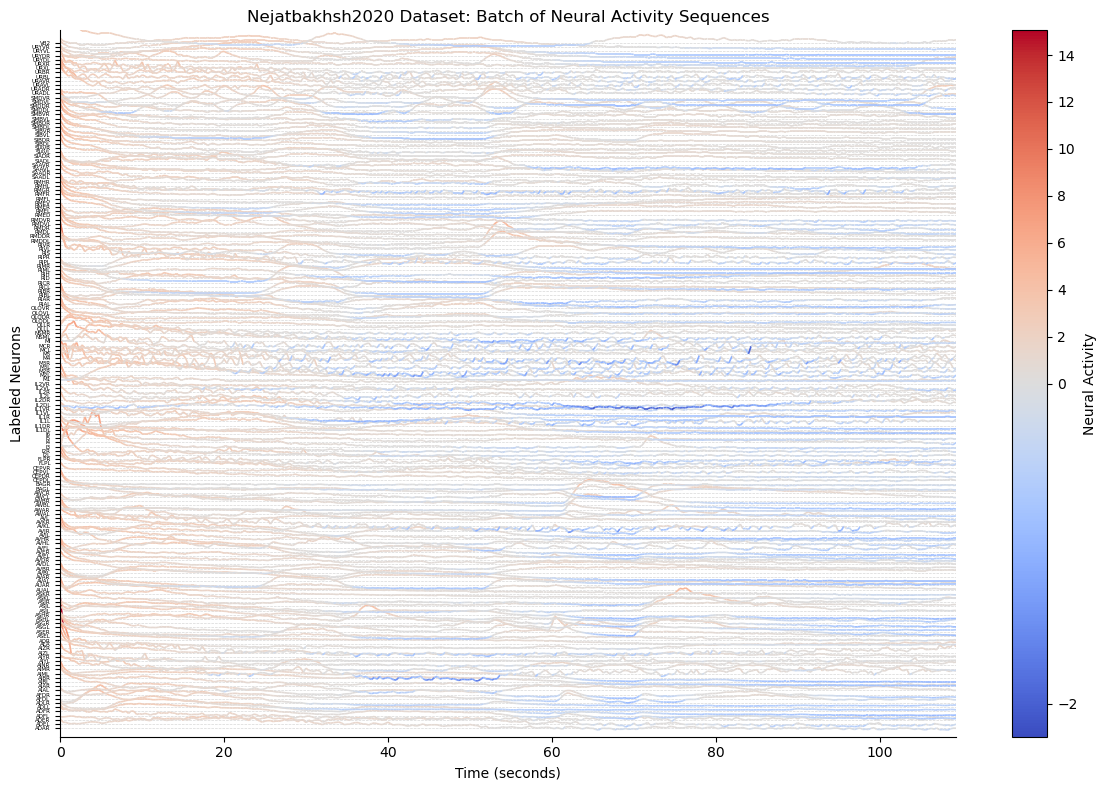

In [14]:
# Set figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define colormap
cmap = plt.get_cmap("coolwarm")

# Find the maximum and minimum magnitude of neural activity across all neurons for normalization
max_activity = np.max(data)
min_activity = np.min(data)

# Normalize the colors with a center at zero
norm = TwoSlopeNorm(vcenter=0, vmin=min_activity, vmax=max_activity)

# Iterate through each neuron and create colored lines
offset = 1.0
segments = []
colors = []

for i in range(data.shape[1]):
    for j in range(len(time) - 1):
        segment = [
            (time[j], data[j, i] + i * offset),
            (time[j + 1], data[j + 1, i] + i * offset),
        ]
        segments.append(segment)

        color = cmap(norm(data[j, i]))
        colors.append(color)

# Create a LineCollection from segments and set the colors
lc = LineCollection(segments, colors=colors, linewidth=1.2)
ax.add_collection(lc)

# Set the limits of the plot
ax.set_xlim(time[0], time[-1])
ax.set_ylim(-2 * offset, (data.shape[1] + 2) * offset)

# Set yticks and other aesthetics
ytick_positions = [i * offset for i in range(data.shape[1])]
ax.set_yticks(ytick_positions)
ax.set_yticklabels(neurons, fontsize=min(8, int(800 / len(neurons))))
ax.grid(axis="y", which="both", linestyle="--", linewidth=0.5, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Labeled Neurons")
ax.set_title(f"{info['worm_dataset']} Dataset: Batch of Neural Activity Sequences")

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Neural Activity")

# Show the plot
plt.tight_layout()
plt.show()